In [10]:
# Create sample time series data - readings every SECOND
np.random.seed(42)

# 3 hours of data at 1 reading per second = 10,800 readings
num_readings = 3 * 60 * 60  # 10,800 readings

data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=num_readings, freq='s'),
    'value': np.random.randint(1, 10, num_readings)
}
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)

print(f"Created {len(df)} sensor readings (1 reading per second)")
print(f"Time span: {df.index.min()} to {df.index.max()}")
print("\nFirst 10 readings:")
print(df.head(10))

Created 10800 sensor readings (1 reading per second)
Time span: 2024-01-01 00:00:00 to 2024-01-01 02:59:59

First 10 readings:
                     value
timestamp                 
2024-01-01 00:00:00      7
2024-01-01 00:00:01      4
2024-01-01 00:00:02      8
2024-01-01 00:00:03      5
2024-01-01 00:00:04      7
2024-01-01 00:00:05      3
2024-01-01 00:00:06      7
2024-01-01 00:00:07      8
2024-01-01 00:00:08      5
2024-01-01 00:00:09      4


In [12]:
# Hopping window parameters
window_size = '3h'  # 3 hours
hop_size = '1h'     # 1 hour

print(f"Window Size: 3 hours (10,800 readings)")
print(f"Hop Size: 1 hour (3,600 readings)")
print(f"Overlap: 2 hours")

Window Size: 3 hours (10,800 readings)
Hop Size: 1 hour (3,600 readings)
Overlap: 2 hours


In [14]:
# Apply rolling window for hopping effect
df['hopping_mean'] = df['value'].rolling(window=window_size, min_periods=1).mean()

print("Hopping window mean calculated!")
print("\nSample: Original vs Aggregated (every 1000th reading):")
print(df[['value', 'hopping_mean']].iloc[::1000].head(10))

Hopping window mean calculated!

Sample: Original vs Aggregated (every 1000th reading):
                     value  hopping_mean
timestamp                               
2024-01-01 00:00:00      7      7.000000
2024-01-01 00:16:40      8      4.901099
2024-01-01 00:33:20      1      4.924538
2024-01-01 00:50:00      8      4.949350
2024-01-01 01:06:40      4      4.959010
2024-01-01 01:23:20      5      4.986003
2024-01-01 01:40:00      4      4.987669
2024-01-01 01:56:40      3      4.977432
2024-01-01 02:13:20      2      4.983252
2024-01-01 02:30:00      1      4.978002


In [15]:
# Create explicit hopping windows
df_reset = df.reset_index()

results = []
start_time = df_reset['timestamp'].min()
end_time = df_reset['timestamp'].max()

window_start = start_time
window_id = 1

while window_start <= end_time:
    window_end = window_start + pd.Timedelta(hours=3)

    # Get data in this window
    window_data = df_reset[(df_reset['timestamp'] >= window_start) &
                           (df_reset['timestamp'] < window_end)]

    if len(window_data) > 0:
        results.append({
            'window_id': window_id,
            'window_start': window_start,
            'window_end': window_end,
            'count': len(window_data),
            'mean': window_data['value'].mean(),
            'min': window_data['value'].min(),
            'max': window_data['value'].max()
        })

    window_start += pd.Timedelta(hours=1)
    window_id += 1

hopping_windows = pd.DataFrame(results)

print(f"Generated {len(hopping_windows)} hopping windows")
print(f"Each window contains ~{hopping_windows['count'].mean():.0f} readings")
print("\nAll windows:")
print(hopping_windows)

Generated 3 hopping windows
Each window contains ~7200 readings

All windows:
   window_id        window_start          window_end  count      mean  min  \
0          1 2024-01-01 00:00:00 2024-01-01 03:00:00  10800  4.988241    1   
1          2 2024-01-01 01:00:00 2024-01-01 04:00:00   7200  5.001806    1   
2          3 2024-01-01 02:00:00 2024-01-01 05:00:00   3600  4.993056    1   

   max  
0    9  
1    9  
2    9  


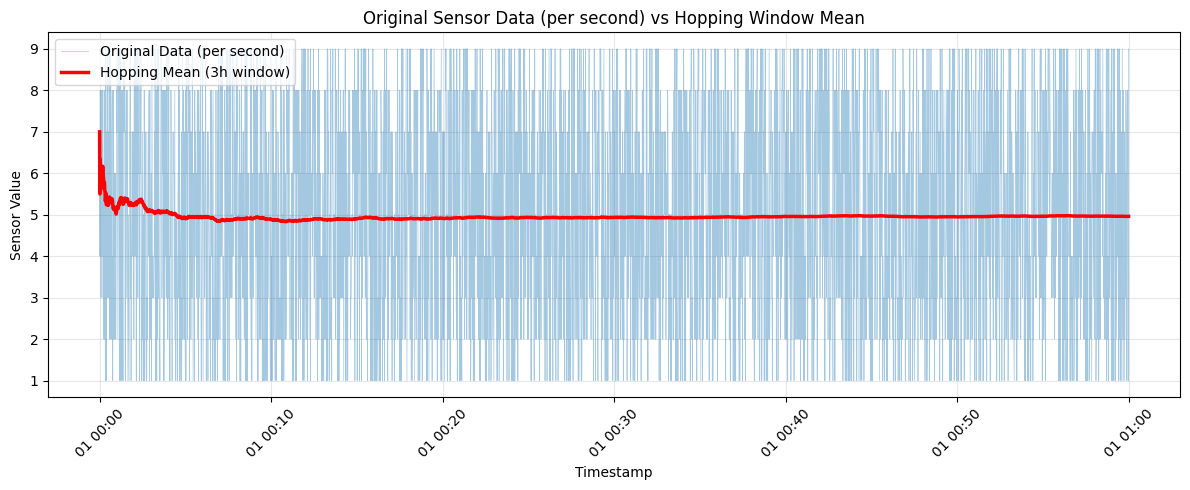

Showing first 1 hour of data for visualization clarity


In [16]:
# Plot sample of data (first 1 hour = 3600 readings)
df_plot = df.reset_index()
sample_size = 3600  # 1 hour of data

plt.figure(figsize=(12, 5))
plt.plot(df_plot['timestamp'][:sample_size], df_plot['value'][:sample_size],
         label='Original Data (per second)', alpha=0.4, linewidth=0.5)
plt.plot(df_plot['timestamp'][:sample_size], df_plot['hopping_mean'][:sample_size],
         label='Hopping Mean (3h window)', linewidth=2.5, color='red')

plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.title('Original Sensor Data (per second) vs Hopping Window Mean')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Showing first 1 hour of data for visualization clarity")

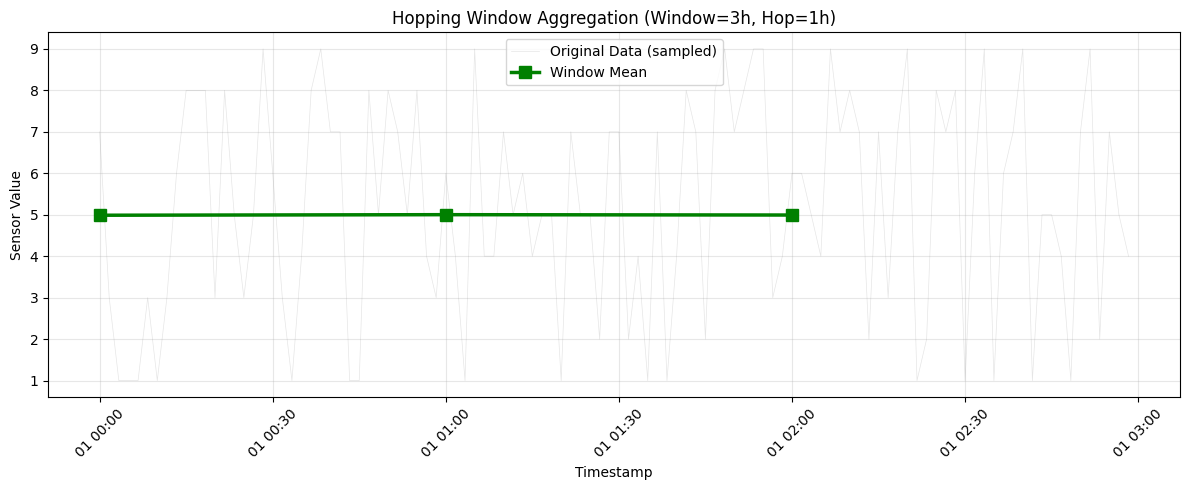

Each green point aggregates ~7200 readings


In [17]:
# Plot discrete hopping window means
plt.figure(figsize=(12, 5))

# Sample original data for background (every 100th point)
plt.plot(df_plot['timestamp'][::100], df_plot['value'][::100],
         label='Original Data (sampled)', alpha=0.2, color='gray', linewidth=0.5)
plt.plot(hopping_windows['window_start'], hopping_windows['mean'],
         label='Window Mean', marker='s', linewidth=2.5, markersize=8, color='green')

plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.title('Hopping Window Aggregation (Window=3h, Hop=1h)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Each green point aggregates ~{hopping_windows['count'].mean():.0f} readings")

In [18]:
# Display complete results
print("="*90)
print("HOPPING WINDOW RESULTS")
print("="*90)
print(f"\nWindow Size: 3 hours | Hop Size: 1 hour")
print(f"Each window aggregates ~10,800 readings (1 reading/second for 3 hours)\n")

# Format output
output = hopping_windows.copy()
output['window_start'] = output['window_start'].dt.strftime('%Y-%m-%d %H:%M:%S')
output['window_end'] = output['window_end'].dt.strftime('%Y-%m-%d %H:%M:%S')
output['mean'] = output['mean'].round(2)

print(output.to_string(index=False))


HOPPING WINDOW RESULTS

Window Size: 3 hours | Hop Size: 1 hour
Each window aggregates ~10,800 readings (1 reading/second for 3 hours)

 window_id        window_start          window_end  count  mean  min  max
         1 2024-01-01 00:00:00 2024-01-01 03:00:00  10800  4.99    1    9
         2 2024-01-01 01:00:00 2024-01-01 04:00:00   7200  5.00    1    9
         3 2024-01-01 02:00:00 2024-01-01 05:00:00   3600  4.99    1    9


In [21]:
# Final summary
print("\n" + "="*70)
print("ASSIGNMENT SUMMARY")
print("="*70)
print(f"\nSensor Frequency: 1 reading per second")
print(f"Total Readings: {len(df):,}")
print(f"Time Period: 3 hours")
print(f"\nWindows Generated: {len(hopping_windows)}")
print(f"Readings per Window: ~{hopping_windows['count'].mean():.0f}")
print(f"Mean of all windows: {hopping_windows['mean'].mean():.2f}")
print("\n✓ Hopping Window Analysis Complete")
print("="*70)


ASSIGNMENT SUMMARY

Sensor Frequency: 1 reading per second
Total Readings: 10,800
Time Period: 3 hours

Windows Generated: 3
Readings per Window: ~7200
Mean of all windows: 4.99

✓ Hopping Window Analysis Complete
